In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")

from analysis_helpers import poisson_waiting_function, \
                            run_multiple_trajectories, \
                            plot_aip_vs_t, \
                            plot_cip_vs_t, \
                            run_sensitivity_sims, \
                            extract_cips, \
                            load_sim_dir

In [2]:
folder = "/nfs01/covid_sims/nominal_sims.1590112019.15/"
nominal_sim_results = load_sim_dir(folder)

done loading realistic_params
done loading realistic_params_testing
done loading optimistic_params_testing
done loading optimistic_params
done loading pessimistic_params_testing
done loading pessimistic_params


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
def extract_severities(dfs):
    severities = []
    for df in dfs:
        all_cols = set(df.columns)
        new_cols = set(['cumulative_mild', 
                        'cumulative_severe', 
                        'severity_0', 
                        'severity_1', 
                        'severity_2', 
                        'severity_3'])
        main_cols = all_cols - new_cols
        subdf = df[list(main_cols)]
        popsize = sum(subdf.iloc[0])
        
        subdf = df[['severity_2', 'severity_3']]
        severe = sum(subdf.iloc[subdf.shape[0]-1])
        
        severities.append(100 * severe / popsize)
    return severities

Text(0,0.5,'Frequency')

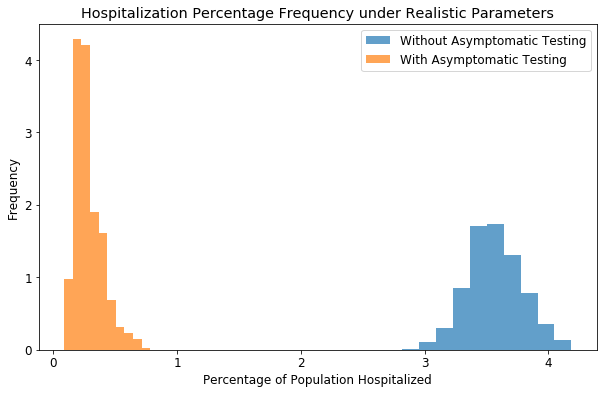

In [5]:
severities = extract_severities(nominal_sim_results['realistic_params'])
severities_testing = extract_severities(nominal_sim_results['realistic_params_testing'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Hospitalization Percentage Frequency under Realistic Parameters")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

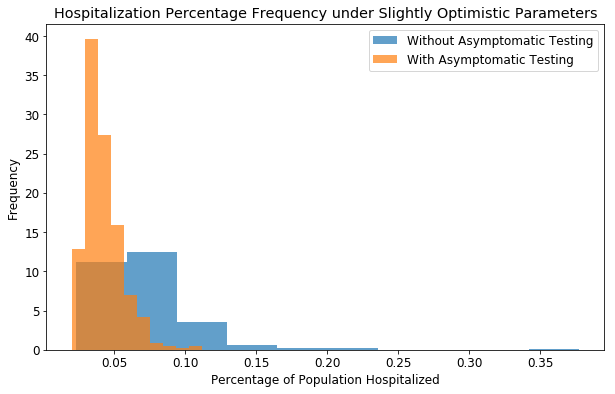

In [6]:
severities = extract_severities(nominal_sim_results['optimistic_params'])
severities_testing = extract_severities(nominal_sim_results['optimistic_params_testing'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Hospitalization Percentage Frequency under Slightly Optimistic Parameters")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

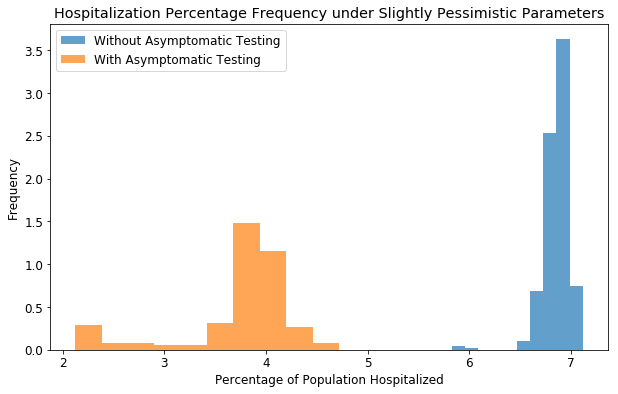

In [7]:
severities = extract_severities(nominal_sim_results['pessimistic_params'])
severities_testing = extract_severities(nominal_sim_results['pessimistic_params_testing'])
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,6))
plt.hist(severities, alpha=0.7, normed=True, label="Without Asymptomatic Testing")
plt.hist(severities_testing, alpha=0.7, label="With Asymptomatic Testing", normed=True)
plt.title("Hospitalization Percentage Frequency under Slightly Pessimistic Parameters")
plt.legend(loc='best')
plt.xlabel("Percentage of Population Hospitalized")
plt.ylabel("Frequency")